# Analysis of Cryptocurrency Market Data

This notebook analyzes cryptocurrency market data from two different time intervals: 5 seconds, and 25 seconds. The goal is to explore the features and identify potential patterns related to market manipulation.

**Note:** The file `features_15S.csv.gz` appears to be corrupted and could not be included in the analysis.

## 1. Loading the Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

# Load the datasets
df_5s = pd.read_csv('../labaled_features/features_5S.csv.gz', compression='gzip')
df_25s = pd.read_csv('../labaled_features/features_25S.csv.gz', compression='gzip')


## 2. Exploring the 5-Second Interval Data

In [3]:
print('Shape of 5s data:', df_5s.shape)
df_5s.head()

Shape of 5s data: (821307, 16)


,date,pump_index,std_rush_order,avg_rush_order,std_trades,std_volume,avg_volume,std_price,avg_price,avg_price_max,hour_sin,hour_cos,minute_sin,minute_cos,symbol,gt
0,2018-12-29 17:00:25,0,-0.002,-0.007,-0.000,0.0,-0.000,-0.001,-0.001,-0.001,-0.998,-0.068,0.000,1.000,BRD,0
1,2018-12-29 17:01:55,0,-0.002,-0.007,-0.001,-0.0,-0.002,-0.001,-0.001,-0.001,-0.998,-0.068,0.106,0.994,BRD,0
2,2018-12-29 17:02:10,0,0.000,0.000,0.000,-0.0,0.000,-0.001,-0.001,-0.001,-0.998,-0.068,0.211,0.977,BRD,0
3,2018-12-29 17:25:00,0,-0.002,-0.007,0.000,0.0,-0.000,-0.001,0.000,0.000,-0.998,-0.068,0.461,-0.887,BRD,0
4,2018-12-29 17:36:05,0,0.000,0.000,-0.000,0.0,-0.000,-0.001,0.000,0.000,-0.998,-0.068,-0.638,-0.770,BRD,0


In [4]:
df_5s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 821307 entries, 0 to 821306
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   date            821307 non-null  object 
 1   pump_index      821307 non-null  int64  
 2   std_rush_order  821307 non-null  float64
 3   avg_rush_order  821307 non-null  float64
 4   std_trades      821307 non-null  float64
 5   std_volume      821307 non-null  float64
 6   avg_volume      821307 non-null  float64
 7   std_price       821307 non-null  float64
 8   avg_price       821307 non-null  float64
 9   avg_price_max   821307 non-null  float64
 10  hour_sin        821307 non-null  float64
 11  hour_cos        821307 non-null  float64
 12  minute_sin      821307 non-null  float64
 13  minute_cos      821307 non-null  float64
 14  symbol          821307 non-null  object 
 15  gt              821307 non-null  int64  
dtypes: float64(12), int64(2), object(2)
memory usage: 100.3+

In [5]:
df_5s.describe()

,pump_index,std_rush_order,avg_rush_order,std_trades,std_volume,avg_volume,std_price,avg_price,avg_price_max,hour_sin,hour_cos,minute_sin,minute_cos,gt
count,821307.000000,821307.000000,821307.000000,821307.000000,821307.000000,821307.000000,821307.000000,821307.000000,821307.000000,821307.000000,821307.000000,821307.000000,821307.000000,821307.000000
mean,166.040707,-0.000129,-0.000271,0.000206,0.000656,-0.000176,-0.000287,-0.000008,-0.000003,-0.121124,0.042832,-0.015121,0.022793,0.000386
std,100.273037,0.015513,0.007438,0.048085,0.099605,0.014145,0.003314,0.001104,0.001192,0.690740,0.711686,0.698909,0.714685,0.019642
min,0.000000,-0.634000,-0.500000,-0.698000,-0.864000,-0.388000,-0.127000,-0.028000,-0.027000,-0.998000,-0.991000,-1.000000,-0.999000,0.000000
25%,78.000000,0.000000,0.000000,0.000000,0.000000,-0.001000,-0.001000,-0.000000,0.000000,-0.817000,-0.577000,-0.716000,-0.698000,0.000000
50%,171.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.136000,-0.068000,0.000000,0.080000,0.000000
75%,255.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.001000,0.000000,0.000000,0.520000,0.683000,0.678000,0.735000,0.000000
max,336.000000,4.710000,2.200000,15.320000,40.638000,5.134000,0.861000,0.171000,0.190000,0.998000,1.000000,1.000000,1.000000,1.000000


In [6]:
df_5s.isnull().sum()

date              0
pump_index        0
std_rush_order    0
avg_rush_order    0
std_trades        0
std_volume        0
avg_volume        0
std_price         0
avg_price         0
avg_price_max     0
hour_sin          0
hour_cos          0
minute_sin        0
minute_cos        0
symbol            0
gt                0
dtype: int64

## 3. Exploring the 25-Second Interval Data

In [7]:
print('Shape of 25s data:', df_25s.shape)
df_25s.head()

Shape of 25s data: (482157, 16)


,date,pump_index,std_rush_order,avg_rush_order,std_trades,std_volume,avg_volume,std_price,avg_price,avg_price_max,hour_sin,hour_cos,minute_sin,minute_cos,symbol,gt
0,2018-12-29 17:00:25,0,-0.001,-0.005,0.0,0.000,-0.000,-0.0,-0.001,-0.001,-0.998,-0.068,0.000,1.000,BRD,0
1,2018-12-29 17:01:40,0,0.000,0.000,0.0,0.000,-0.000,-0.0,-0.001,-0.001,-0.998,-0.068,0.106,0.994,BRD,0
2,2018-12-29 17:02:05,0,0.000,0.000,0.0,-0.000,-0.002,-0.0,-0.001,-0.001,-0.998,-0.068,0.211,0.977,BRD,0
3,2018-12-29 17:25:00,0,0.000,0.000,0.0,-0.001,-0.004,-0.0,0.000,0.000,-0.998,-0.068,0.461,-0.887,BRD,0
4,2018-12-29 17:35:50,0,0.000,0.000,-0.0,-0.000,0.000,-0.0,0.000,0.000,-0.998,-0.068,-0.553,-0.833,BRD,0


In [8]:
df_25s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 482157 entries, 0 to 482156
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   date            482157 non-null  object 
 1   pump_index      482157 non-null  int64  
 2   std_rush_order  482157 non-null  float64
 3   avg_rush_order  482157 non-null  float64
 4   std_trades      482157 non-null  float64
 5   std_volume      482157 non-null  float64
 6   avg_volume      482157 non-null  float64
 7   std_price       482157 non-null  float64
 8   avg_price       482157 non-null  float64
 9   avg_price_max   482157 non-null  float64
 10  hour_sin        482157 non-null  float64
 11  hour_cos        482157 non-null  float64
 12  minute_sin      482157 non-null  float64
 13  minute_cos      482157 non-null  float64
 14  symbol          482157 non-null  object 
 15  gt              482157 non-null  int64  
dtypes: float64(12), int64(2), object(2)
memory usage: 58.9+ 

In [9]:
df_25s.describe()

,pump_index,std_rush_order,avg_rush_order,std_trades,std_volume,avg_volume,std_price,avg_price,avg_price_max,hour_sin,hour_cos,minute_sin,minute_cos,gt
count,482157.000000,482157.000000,482157.000000,482157.000000,482157.000000,482157.000000,482157.000000,482157.000000,482157.000000,482157.000000,482157.000000,482157.000000,482157.000000,482157.000000
mean,163.651914,0.000456,-0.000110,0.000933,0.002112,0.000097,-0.000135,-0.000014,-0.000006,-0.083772,0.028490,-0.012240,0.023586,0.000657
std,98.853939,0.059436,0.007755,0.098056,0.219304,0.022000,0.004577,0.001459,0.002069,0.693841,0.714758,0.698921,0.714692,0.025633
min,0.000000,-0.546000,-0.255000,-0.543000,-0.774000,-0.405000,-0.360000,-0.024000,-0.025000,-0.998000,-0.991000,-1.000000,-0.999000,0.000000
25%,77.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.001000,-0.001000,-0.001000,-0.731000,-0.577000,-0.716000,-0.698000,0.000000
50%,168.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.136000,-0.068000,0.000000,0.080000,0.000000
75%,248.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001000,0.000000,0.000000,0.631000,0.683000,0.678000,0.735000,0.000000
max,336.000000,15.510000,1.294000,30.708000,71.043000,6.658000,1.756000,0.311000,0.916000,0.998000,1.000000,1.000000,1.000000,1.000000


In [10]:
df_25s.isnull().sum()

date              0
pump_index        0
std_rush_order    0
avg_rush_order    0
std_trades        0
std_volume        0
avg_volume        0
std_price         0
avg_price         0
avg_price_max     0
hour_sin          0
hour_cos          0
minute_sin        0
minute_cos        0
symbol            0
gt                0
dtype: int64

## 4. Data Visualization

### 4.1. Distribution of the 'gt' Column

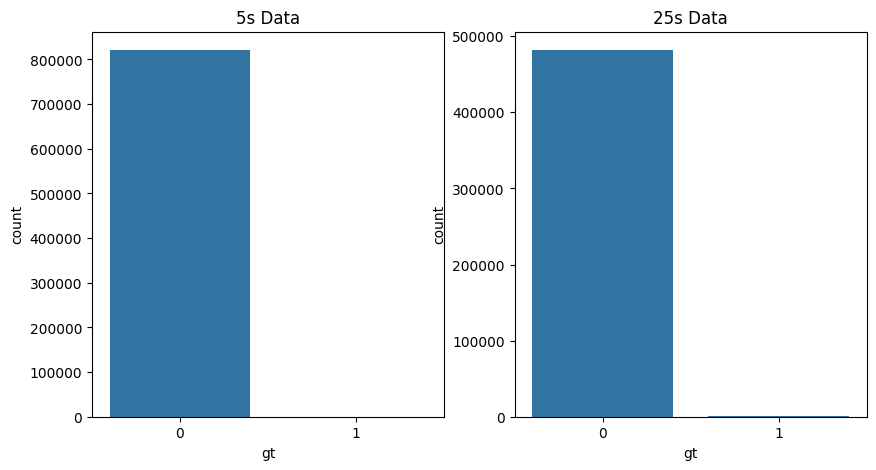

In [11]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.countplot(x='gt', data=df_5s)
plt.title('5s Data')
plt.subplot(1, 2, 2)
sns.countplot(x='gt', data=df_25s)
plt.title('25s Data')
plt.show()

The 'gt' column is our target variable. A value of 1 indicates a pump-and-dump event, while 0 indicates a normal event. We can see that the datasets are highly imbalanced, with many more normal events than pump-and-dump events.

THis is a highly biased data set with alot of transcations bieng normal for the market except for few ones that are under market manipulation.

### 4.2. Correlation Matrix

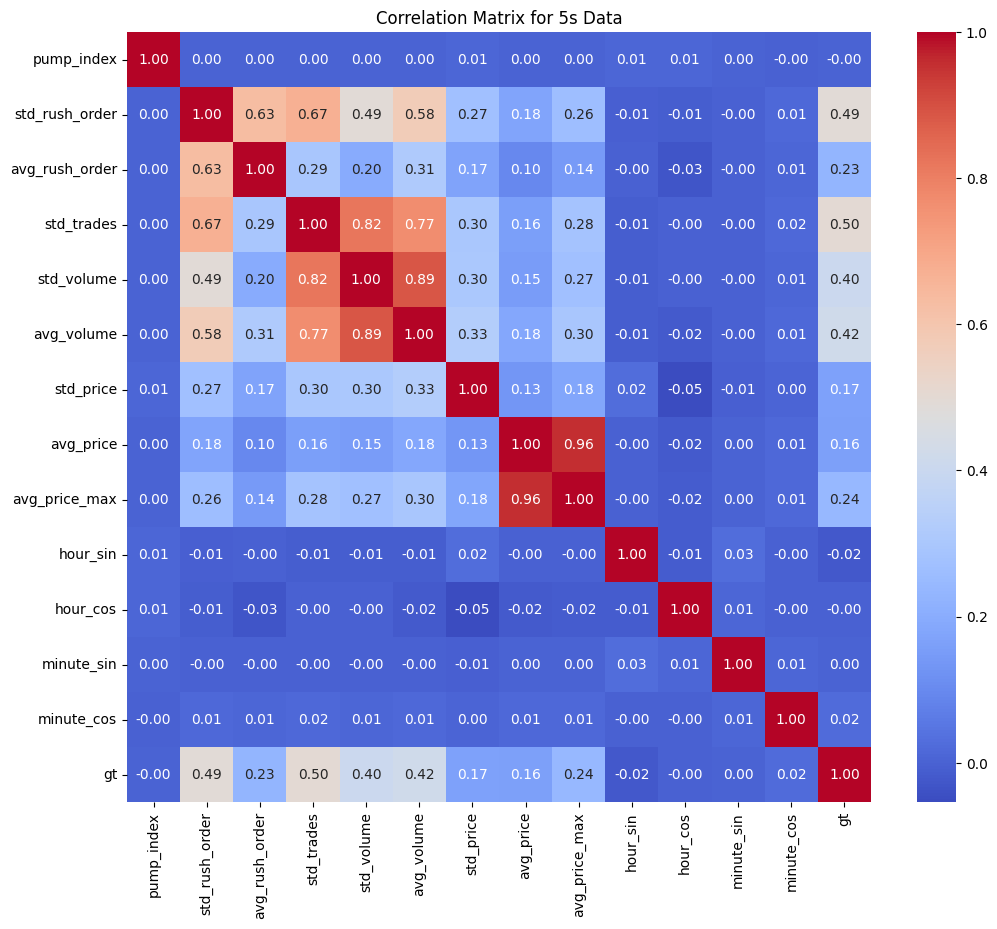

In [12]:
plt.figure(figsize=(12, 10))
corr = df_5s.drop(columns=['date', 'symbol']).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix for 5s Data')
plt.show()

so off course the std rush order and rush order attributes are going to have high correlation but the fact that correlation is not exaclt 1 means  that there is infomation to learn from this column test pca to see if there are important columns

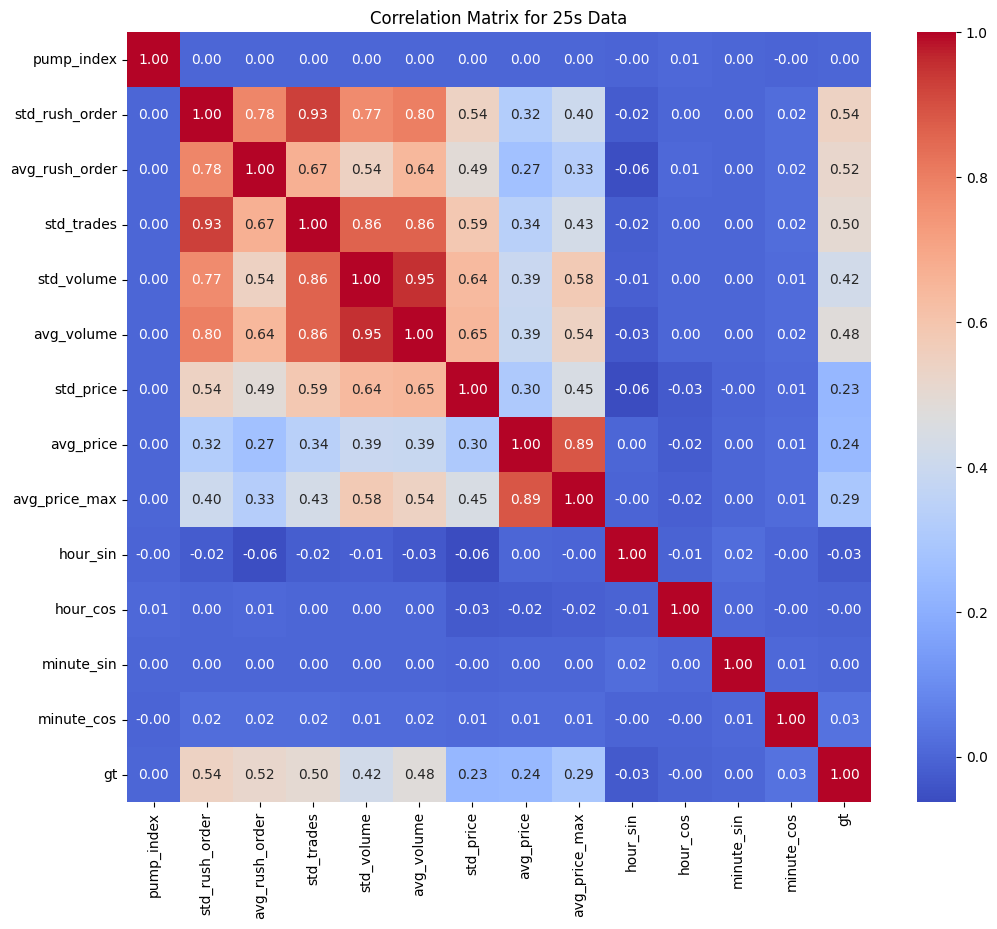

In [13]:
plt.figure(figsize=(12, 10))
corr = df_25s.drop(columns=['date', 'symbol']).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix for 25s Data')
plt.show()

So the correlation btw values grows and the size of the rolling window increases , so this means that in a PCA, we would remove alot of this columns 

## 5. Insights For the classifier

Based on the initial exploration, we can draw the following conclusions:

- **Data Imbalance:** Both datasets are highly imbalanced, which will need to be addressed during the model training phase (e.g., using techniques like SMOTE or oversampling).
- **No Missing Values:** There are no missing values in the datasets, which simplifies the preprocessing steps.
- **Feature Correlation:** The correlation matrix for the 5s data shows some interesting relationships between features. For example, `avg_price` and `avg_price_max` are highly correlated. This could indicate multicollinearity, which might need to be addressed.
THis correlation only grows further when the size of the rolling window increases from 5 seconds to 25 seconds
- **Time Intervals:** The different time intervals provide different granularities of the market data. The 5-second data will be more volatile and capture short-term fluctuations, while the 25-second data will be smoother and capture longer-term trends.

This initial analysis provides a good foundation for building a machine learning model to detect pump-and-dump schemes. The next steps would involve feature engineering, handling the class imbalance, and training and evaluating various classification models.

## 6. Model Training and Evaluation

### 6.1. Simple Model: Logistic Regression

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Prepare the data
X = df_5s.drop(columns=['date', 'symbol', 'gt'])
y = df_5s['gt']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the model
lr = LogisticRegression(random_state=42)
lr.fit(X_train_scaled, y_train)

# Make predictions
y_pred = lr.predict(X_test_scaled)

# Evaluate the model
print('Simple Logistic Regression Results:')
# accuracy means that off all the predictions, how many were correct
print(f'Accuracy: {accuracy_score(y_test, y_pred):.4f}')
# percision means that of all the positive predictions, how many were actually positive
print(f'Precision: {precision_score(y_test, y_pred):.4f}')
# recall means that all all actual positives how many were correctly predicted as positive
print(f'Recall: {recall_score(y_test, y_pred):.4f}')
print(f'F1-score: {f1_score(y_test, y_pred):.4f}')
print('\nClassification Report:\n', classification_report(y_test, y_pred))

Simple Logistic Regression Results:
Accuracy: 0.9998
Precision: 0.8298
Recall: 0.6190
F1-score: 0.7091

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    164199
           1       0.83      0.62      0.71        63

    accuracy                           1.00    164262
   macro avg       0.91      0.81      0.85    164262
weighted avg       1.00      1.00      1.00    164262



Ok so this is insane i am able to predict with accuracy of 99% the where the whethet it is a natural market event or a price manipulation effect

This lower recall means that some of the rush orders flagged to be price manipulation schemes where not really artificial but i can live with that

In [15]:
# Prepare the data
X = df_5s.drop(columns=['date', 'symbol', 'gt'])
y = df_5s['gt']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the model
lr = LogisticRegression(class_weight='balanced',random_state=42)
lr.fit(X_train_scaled, y_train)

# Make predictions
y_pred = lr.predict(X_test_scaled)

# Evaluate the model
print('Balanced Logistic Regression Results:')
# accuracy means that off all the predictions, how many were correct
print(f'Accuracy: {accuracy_score(y_test, y_pred):.4f}')
# percision means that of all the positive predictions, how many were actually positive
print(f'Precision: {precision_score(y_test, y_pred):.4f}')
# recall means that all all actual positives how many were correctly predicted as positive
print(f'Recall: {recall_score(y_test, y_pred):.4f}')
print(f'F1-score: {f1_score(y_test, y_pred):.4f}')
print('\nClassification Report:\n', classification_report(y_test, y_pred))

Balanced Logistic Regression Results:
Accuracy: 0.9962
Precision: 0.0889
Recall: 0.9524
F1-score: 0.1626

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    164199
           1       0.09      0.95      0.16        63

    accuracy                           1.00    164262
   macro avg       0.54      0.97      0.58    164262
weighted avg       1.00      1.00      1.00    164262



### 6.2. Addressing Class Imbalance with SMOTE

In [16]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

lr_smote = LogisticRegression(random_state=42)
lr_smote.fit(X_train_resampled, y_train_resampled)

y_pred_smote = lr_smote.predict(X_test_scaled)

print('Logistic Regression with SMOTE Results:')
print(f'Accuracy: {accuracy_score(y_test, y_pred_smote):.4f}')
print(f'Precision: {precision_score(y_test, y_pred_smote):.4f}')
print(f'Recall: {recall_score(y_test, y_pred_smote):.4f}')
print(f'F1-score: {f1_score(y_test, y_pred_smote):.4f}')
print('\nClassification Report:\n', classification_report(y_test, y_pred_smote))

Logistic Regression with SMOTE Results:
Accuracy: 0.9969
Precision: 0.1062
Recall: 0.9524
F1-score: 0.1911

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    164199
           1       0.11      0.95      0.19        63

    accuracy                           1.00    164262
   macro avg       0.55      0.97      0.59    164262
weighted avg       1.00      1.00      1.00    164262



oh my God , SMote is really is better for this imbalanced data set since now  have a recall of 90% meaning that of the if a rush order event is flagged there is high chances it is really a pump effect

BUt it has it draw back a precision of 10% means that of the flagged transactions 90% are false positives

THis has a lowerere F1-score so the simple logistic regression is better

## Analysis of logistic regression models

So i geuss it is kind of obviouse why we get this scores so in the first

# 1. simple logistic regression model
It gets to be like this since we know the data is imbalanced and so this model just always says that it is not a pump and dump by saying this for almost any situation it will get the ansa right and this is why it has a  lower recall because it misses true pump and  dump activities

# 2. balance logistic regression model 
This one adds more weigh to the true pumps b4 training so that the dataset is alittle balanced so this makes the recall high because know it is able to predict and say that it is not all the time that the market is normal some are artificial pumps but this makes the precision low and so we have alot of false positives. Good so we doin't miss false positives but now we have them to much and we need to know real positives from false ones

# 3. smote logistic regression model

THis technology creates a synthtic data of artificial pumps so that the model can know how this pumps look like but you can see that now we have this the model has high recal it does not miss the market manipulation pumps but now it has a low accuracy so now out of the flagged market manipulations we have to see which ones are not real ones

## summary for logistic regression

All of the have low F1 score so we try our luck with Randomforest and xGboooooost 

### 6.3. Model Improvement: RandomForestClassifier


In [17]:
# To speed up the training, we'll use a smaller subset of the resampled data
X_train_resampled_small, _, y_train_resampled_small, _ = train_test_split(
    X_train_scaled, y_train, test_size=0.5, random_state=42, stratify=y_train
)

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_resampled_small, y_train_resampled_small)

y_pred_rf = rf.predict(X_test_scaled)

print('Simple Random Forest Results:')
print(f'Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}')
print(f'Precision: {precision_score(y_test, y_pred_rf):.4f}')
print(f'Recall: {recall_score(y_test, y_pred_rf):.4f}')
print(f'F1-score: {f1_score(y_test, y_pred_rf):.4f}')
print('\nClassification Report:\n', classification_report(y_test, y_pred_rf))

Simple Random Forest Results:
Accuracy: 0.9999
Precision: 0.9787
Recall: 0.7302
F1-score: 0.8364

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    164199
           1       0.98      0.73      0.84        63

    accuracy                           1.00    164262
   macro avg       0.99      0.87      0.92    164262
weighted avg       1.00      1.00      1.00    164262



In [18]:
# To speed up the training, we'll use a smaller subset of the resampled data
X_train_resampled_small, _, y_train_resampled_small, _ = train_test_split(
    X_train_resampled, y_train_resampled, test_size=0.9, random_state=42, stratify=y_train_resampled
)

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_resampled_small, y_train_resampled_small)

y_pred_rf = rf.predict(X_test_scaled)

print('Random Forest with SMOTE Results:')
print(f'Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}')
print(f'Precision: {precision_score(y_test, y_pred_rf):.4f}')
print(f'Recall: {recall_score(y_test, y_pred_rf):.4f}')
print(f'F1-score: {f1_score(y_test, y_pred_rf):.4f}')
print('\nClassification Report:\n', classification_report(y_test, y_pred_rf))

Random Forest with SMOTE Results:
Accuracy: 0.9995
Precision: 0.4560
Recall: 0.9048
F1-score: 0.6064

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    164199
           1       0.46      0.90      0.61        63

    accuracy                           1.00    164262
   macro avg       0.73      0.95      0.80    164262
weighted avg       1.00      1.00      1.00    164262



# XGBOOOOOOOOOOOOOOOOOOOOOOOOOOOOOST

In [19]:
# NOW creaing a simple xgboost model
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train_scaled, y_train)
y_pred_xgb = xgb.predict(X_test_scaled)
print('Simple XGBoost Results:')
print(f'Accuracy: {accuracy_score(y_test, y_pred_xgb):.4f}')
print(f'Precision: {precision_score(y_test, y_pred_xgb):.4f}')
print(f'Recall: {recall_score(y_test, y_pred_xgb):.4f}')
print(f'F1-score: {f1_score(y_test, y_pred_xgb):.4f}')
print('\nClassification Report:\n', classification_report(y_test, y_pred_xgb))

/home/kimani/Desktop/moringa/phase5/Pump-and-Dump_and_market_manipulation_detection/pyenv/lib/python3.12/site-packages/xgboost/training.py:200: UserWarning: [10:56:50] WARNING: /__w/xgboost/xgboost/src/learner.cc:782: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Simple XGBoost Results:
Accuracy: 0.9998
Precision: 0.6818
Recall: 0.7143
F1-score: 0.6977

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    164199
           1       0.68      0.71      0.70        63

    accuracy                           1.00    164262
   macro avg       0.84      0.86      0.85    164262
weighted avg       1.00      1.00      1.00    164262

